#### Text clustering methods to classify news articles into topics: 'business', 'entertainment', 'politics', 'sport', and 'tech'

In [2]:
# Import the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import time

from IPython.display import clear_output

In [17]:
def process_document (section_folder):
    document = []
    # For every document in the section
    for filename in os.listdir(section_folder):
        if (filename != '.ipynb_checkpoints'):
                file = root_folder+'/'+folder_name+'/'+filename
            
                with open(file,'r') as file:
                    for line in file:
                        for word in line.split():
                            # Check for empty word
                            # Clean word -- remove capitalization and punctuation
                            word = word.lower()
                            word = re.sub(r'[^\w\s]', '', word)
                            if (len(word) != 0):
                                document.append(word)       
    return document

def create_vocab (document_arr):
    # List of common words to not be included in the vocab
    common = ['the', 'it', 'an', 'on', 'a', 'at', 'is', 'of', 'to', 'was', 'and', 'in', 'i', 'for', 'that', 'be', 'as', 'not',
             'said','with', 'he', 'she', 'her', 'be', 'as', 'will', 'have', 'has', 'for', 'by', 'they', 'but', 'its',
             'which', 'his', 'their', 'there', 'up', 'what', 'how', 'from', 'than', 'about', 'you', 'after', 'been', 'also',
             'this', 'been', 'are', 'can', 'or', 'more', 'were', 'would', 'could', 'we', 'other', 'us', 'them', 'we', 'some',
             'or', 'can', 'had', 'our', 'who', 'when', 'would', 'could', 'if', 'why', 'were', 'can', 'may', 'mr', 'such']

    vocab = []
    
    for i in range (0, len(document_arr)):
        document = document_arr[i]
        for j in range (0, len(document)):
            # Create unique vocab
            if (document[j] not in vocab and document[j] not in common):
                vocab.append(document[j]) 
                
    return vocab

def create_bag_of_words (document, vocab):
    num_words = len(vocab)
    
    bag = [0] * num_words
    for j in range (0, num_words):
        clear_output(wait=True)
        print('Document: %d  --- %d%%' % (i, (j/num_words * 100)))
        # Count the number of occurences of vocab in the document
        bag[j] = document.count(vocab[j])
                        
    return bag

def create_document (root_folder):
    # Create document for testing
    document = []
    section = []

    sub_folders = [name for name in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, name))]

    # For each section
    for folder_name in sub_folders:   
        cur_folder = root_folder+'/'+folder_name
    
        if (folder_name != '.ipynb_checkpoints'):
            doc = []
             # For every document in the section
            for filename in os.listdir(cur_folder):
                if (filename != '.ipynb_checkpoints'):
                    file = root_folder+'/'+folder_name+'/'+filename
            
                    with open(file,'r', encoding="utf8") as file:
                        for line in file:
                            for word in line.split():
                                # Check for empty word
                                # Clean word -- remove capitalization and punctuation
                                word = word.lower()
                                word = re.sub(r'[^\w\s]', '', word)
                                if (len(word) != 0):
                                    doc.append(word)
                    # For each section
                    document.append(doc)
                    section.append(folder_name)
                    
    return document, section

#### Preprocessing Data
To turn the documents into numerical data, count the frequency of each word in the all of the documents in each section. All the text files under each section were treated as one document. The vocab array contains all the unique words to create find the frequency of each word to create the document vectors in create_bag_of_words function.

To clean the text document, uncapitalize all the words and removed the punctuation. 

In [7]:
# Load all the documents under the bbc folder
document = []
sections = []

root_folder = './bbc'
sub_folders = [name for name in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, name))]

print ("Sections: ")
# For each section
for folder_name in sub_folders:   
    cur_folder = root_folder+'/'+folder_name
    
    if (folder_name != '.ipynb_checkpoints'):
        print (folder_name)
        # For each section
        doc = process_document(cur_folder)
        document.append(doc)
        sections.append(folder_name)
    
print ("\nDocuments Shape: ")
print ("(", len(document), ",", len(document[0]), ")")

Sections: 
business
entertainment
politics
sport
tech

Documents Shape: 
( 5 , 135501 )


In [8]:
start_time = time.time()

# Use document to get unique words to create vocab
vocab = create_vocab (document)

end_time = time.time()
print("Runtime: ", end_time - start_time)

Runtime:  548.6284964084625


In [9]:
start_time = time.time()

document_vectors = []
# Create document vectors -- numerical - frequency of each vocab in the document
for i in range (0, len(document)):
    document_vectors.append(create_bag_of_words(document[i], vocab))

end_time = time.time()
print("Runtime: ", end_time - start_time)

Document: 4  --- 99%
Runtime:  1367.6496031284332


In [10]:
document_vectors = np.array(document_vectors)
print (document_vectors.shape)

(5, 30512)


In [14]:
document_dev, section = create_document ('./dev')
    
print ("Document: ", len(document_dev))
print ("Section: ", len(section))

Document:  266
Section:  266


#### K Means

In [20]:
from sklearn.cluster import KMeans

# Number of clusters = 5 topics
kmeans = KMeans(n_clusters=5, random_state=0).fit(document_vectors)

# Store the top terms for each section
top_terms = []
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(5):
    class_top_terms = []
    for index in order_centroids[i, :50]:
        class_top_terms.append(vocab[index])  
    
    top_terms.append(class_top_terms)
    
for i in range (0, 5):
    print ("Cluster : ", i)
    print (top_terms[i][:10])

Top terms per cluster:
Cluster :  0
['people', 'new', 'technology', 'one', 'games', 'users', 'out', 'use', 'many', 'mobile']
Cluster :  1
['government', 'people', 'labour', 'blair', 'new', 'election', 'party', 'should', 'minister', 'told']
Cluster :  2
['best', 'music', 'film', 'one', 'show', 'years', 'new', 'last', 'year', 'awards']
Cluster :  3
['year', 'new', 'market', 'growth', 'company', 'economy', 'last', 'firm', 'sales', 'oil']
Cluster :  4
['game', 'against', 'out', 'all', 'england', 'over', 'first', 'win', 'time', 'world']


#### Compare number of occurences
Find the number of intersection between the cluster label and words in the document. The document is labeled with labeled with the maximum number of intersections.

In [21]:
correct = 0
# The cluster labels need to be hard coded
cluster_label = ['tech', 'politics', 'entertainment', 'business', 'sport']

# For each dev documents
for i in range (0, len(document_dev)):
    intersection = []
    # Find the label with the max intersecting terms 
    for j in range (0, 5):
        intersection.append(len(list(set(document_dev[i]) & set(top_terms[j]))))
    index = intersection.index(max(intersection))
    if (cluster_label[index] == section[i]):
        correct += 1
    
print ("Accuracy: %.2f" % (correct/len(document_dev)))

Accuracy: 1.00


All documents were classified correctly so I created documents with news articles that were not from the bbc but they were still classified correctly

In [22]:
non_bbc, non_bbc_section = create_document ('./Articles')
    
print ("Document: ", len(non_bbc))
print ("Section: ", len(non_bbc_section))

Document:  55
Section:  55


In [24]:
correct = 0

# For each non bbc documents
for i in range (0, len(non_bbc)):
    intersection = []
    # Find the label with the max intersecting terms 
    for j in range (0, 5):
        intersection.append(len(list(set(non_bbc[i]) & set(top_terms[j]))))
    index = intersection.index(max(intersection))
    if (cluster_label[index] == non_bbc_section[i]):
        correct += 1
    
print ("Accuracy: %.2f" % (correct/len(non_bbc)))

Accuracy: 1.00


#### tf-idf : Term Frequency – Inverse Document Frequency
tf-idf = tf * idf
<br/>
tf = number of occurences in current document
<br/>
idf = log ((1+n)/(1+( number of documents in the document set that contain term)) + 1

In [109]:
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer

def create_corpus (root_folder):
    corpus = []
    sub_folders = [name for name in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, name))]

    # For each section
    for folder_name in sub_folders:   
        cur_folder = root_folder+'/'+folder_name
    
        if (folder_name != '.ipynb_checkpoints'):
             # For every document in the section
            for filename in os.listdir(cur_folder):
                if (filename != '.ipynb_checkpoints'):
                    filename = root_folder+'/'+folder_name+'/'+filename
                    #load text
                    file = open(filename, 'rt',encoding="utf8")
                    corpus.append(file.read())
                    file.close()
    return corpus

def clean_text (text):
    common = ['the', 'it', 'an', 'on', 'a', 'at', 'is', 'of', 'to', 'was', 'and', 'in', 'i', 'for', 'that', 'be', 'as', 'not',
             'said','with', 'he', 'she', 'her', 'be', 'as', 'will', 'have', 'has', 'for', 'by', 'they', 'but', 'its',
             'which', 'his', 'their', 'there', 'up', 'what', 'how', 'from', 'than', 'about', 'you', 'after', 'been', 'also',
             'this', 'been', 'are', 'can', 'or', 'more', 'were', 'would', 'could', 'we', 'other', 'us', 'them', 'we', 'some',
             'or', 'can', 'had', 'our', 'who', 'when', 'would', 'could', 'if', 'why', 'were', 'can', 'may', 'mr', 'such']
    
    # Uncapitalize
    text = text.lower()
    # Remove common words
    for i in range (0, len(common)):
        text = text.replace(' '+common[i]+' ', ' ')
        
    # Use stemming to find root words
    lancaster=LancasterStemmer()
    porter=PorterStemmer()
    
    stemmed_text = []
    for word in text.split():
        stemmed_text.append(porter.stem(word))
    stemmed_text = ' '.join(stemmed_text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', stemmed_text)
    text = re.sub(r'\d+', '', text)
    
    return text

In [99]:
# Create corpus with the documents in the main folder
root_folder = './bbc'
corpus = create_corpus (root_folder)
print ("Number of Documents: " , len(corpus))

print ("\nOriginal:\n")
print (corpus[0])

for i in range (0, len(corpus)):
    corpus[i] = clean_text (corpus[i])
    
print ("Cleaned:\n")
print (corpus[0])

Number of Documents:  1698

Original:

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner intern

To visualize the clusters, the vectors have to be reduced to 2 dimensional but with PCA, the accuracy is reduced by a lot.

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Find vector representation of text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).todense()

# Reduce to visualize
pca = PCA(2).fit(X)
X = pca.transform(X)

# Kmeans with 5 clusters
kmeans = KMeans(n_clusters=5).fit(X)

print(kmeans.cluster_centers_)
print (kmeans.labels_)

[[-0.07946816 -0.06642482]
 [ 0.05117032 -0.0433328 ]
 [-0.12948777  0.27278551]
 [ 0.1405334   0.04755043]
 [-0.04752027  0.07809142]]
[0 0 0 ... 0 1 1]


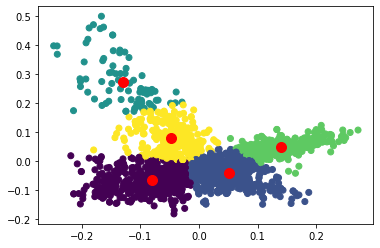

In [101]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color="red")

In [102]:
# Reload the vector without PCA
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).todense()

# Use K Means with 5 clusters
kmeans = KMeans(n_clusters=5).fit(X)

print(kmeans.cluster_centers_)
print (kmeans.labels_)

[[-6.77626358e-20  2.05998413e-18 -2.37169225e-20 ...  1.72710245e-02
  -2.30392962e-19 -6.09863722e-20]
 [-6.09863722e-20  3.30995052e-03  9.14795583e-20 ...  5.96120891e-03
   4.31982240e-04  1.35525272e-19]
 [ 2.08750498e-04  3.36102673e-18  8.80914265e-20 ...  6.74663008e-03
   1.89735380e-19  9.48676901e-20]
 [-7.45388994e-20  4.01154804e-18  1.01643954e-19 ...  1.49199325e-02
   1.76182853e-19  2.04417396e-04]
 [-5.42101086e-20  2.92734587e-18  1.46084485e-04 ...  2.19366439e-03
  -1.49077799e-19 -5.42101086e-20]]
[3 3 3 ... 4 4 4]


In [103]:
# Load the documents in the dev folder
root_folder = './dev'
corpus_dev = create_corpus (root_folder)
print ("Number of Documents: " , len(corpus_dev))
for i in range (0, len(corpus_dev)):
    corpus_dev[i] = clean_text (corpus_dev[i])
    
dev_X = vectorizer.transform(corpus_dev).todense()
prediction = kmeans.predict(dev_X)

Number of Documents:  266


To find the accuracy, I had to look at the top terms in each cluster and assign a label to each cluster

In [104]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("\nCluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')

Top terms per cluster:

Cluster 0: film award best music band star album top song show
Cluster 1: game england club play win player against team it chelsea
Cluster 2: labour blair tori parti minist govern elect brown say lord
Cluster 3: bn growth bank market firm year sale oil price compani
Cluster 4: use game peopl mobil phone technolog music user microsoft digit

In [106]:
cluster_label = {'entertainment': 0,'sport': 1, 'politics': 2, 'business': 3, 'tech':4}
real = [cluster_label[name] for name in section]

# Use real labels and the predicted labels to find the accuracy
accuracy = 0
for i in range (0, len(prediction)):
    if (prediction[i] == real[i]):
        accuracy += 1
        
accuracy /= len(prediction)
print (accuracy*100)

96.61654135338345


Some of the entertainment articles were classified as tech. This makes sense because with Netflix and other streaming services the content of tech and entertainment articles overlap. There was also some confusion between politcal and business article because some articles talk about the interaction between the political decisions that affect the economy which change things for businesses.

{'entertainment': 0, 'sport': 1, 'politics': 2, 'business': 3, 'tech': 4}


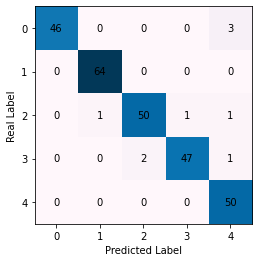

In [107]:
from sklearn.metrics import confusion_matrix

print (cluster_label)

cm = confusion_matrix(real, prediction)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='PuBu')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Predicted Label")
plt.ylabel("Real Label")
plt.show()

In [110]:
# Test tf-idf with non bbc articles
root_folder = './Articles'
corpus_nb = create_corpus (root_folder)
print ("Number of Documents: " , len(corpus_nb))
for i in range (0, len(corpus_nb)):
    corpus_nb[i] = clean_text (corpus_nb[i])
    
# Find vector representation of the documents
nb_X = vectorizer.transform(corpus_nb).todense()
prediction = kmeans.predict(nb_X)

real = [cluster_label[name] for name in non_bbc_section]

accuracy = 0
for i in range (0, len(prediction)):
    if (prediction[i] == real[i]):
        accuracy += 1
        
accuracy /= len(prediction)
print (accuracy*100)

Number of Documents:  55
76.36363636363637


The model was less accurate with articles from outside the bbc. There was confusion between tech and entertainment, and business and politics. 

{'entertainment': 0, 'sport': 1, 'politics': 2, 'business': 3, 'tech': 4}


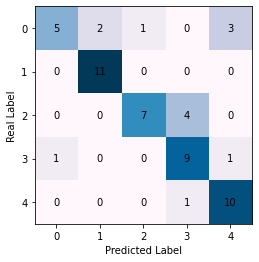

In [111]:
print (cluster_label)

cm = confusion_matrix(real, prediction)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='PuBu')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Predicted Label")
plt.ylabel("Real Label")
plt.show()

#### LDA
LDA finds the different topics in one document. I made one text file from all the documents from all the sections and then printed out the topics.  

In [165]:
def create_lda_document (root_folder):
    # Create document for testing
    document = []

    sub_folders = [name for name in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, name))]

    # For each section
    for folder_name in sub_folders:   
        cur_folder = root_folder+'/'+folder_name
    
        if (folder_name != '.ipynb_checkpoints'):
             # For every document in the section
            for filename in os.listdir(cur_folder):
                if (filename != '.ipynb_checkpoints'):
                    file = root_folder+'/'+folder_name+'/'+filename
            
                    with open(file,'r') as file:
                        for line in file:
                            for word in line.split():
                                # Check for empty word
                                # Clean word -- remove capitalization and punctuation
                                word = word.lower()
                                word = re.sub(r'[^\w\s]', '', word)
                                if (len(word) != 0):
                                    document.append(word)
                                
    return document

In [175]:
import gensim
import json

corpus = create_lda_document('./bbc')
with open('lda_text.txt', 'w') as f:
    f.write(json.dumps(corpus))

corpus = gensim.corpora.textcorpus.TextCorpus('lda_text.txt')
model = gensim.models.LdaModel(corpus, id2word=corpus.dictionary,alpha='auto',num_topics=5)

model.show_topic(1)

[('said', 0.017761817),
 ('people', 0.005497959),
 ('new', 0.0045126),
 ('year', 0.0029477368),
 ('years', 0.0028216878),
 ('government', 0.0027471026),
 ('best', 0.0023915232),
 ('told', 0.0021941843),
 ('world', 0.0021570204),
 ('time', 0.0020423122)]